<a href="https://colab.research.google.com/github/oluwoleowoeye/food-price-analysis/blob/main/Visualization_and_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Get the raw file URL
github_url = "https://github.com/oluwoleowoeye/food-price-analysis/blob/main/cleaned_food_price_data.xlsx"
raw_url = github_url.replace("blob/", "").replace("github.com", "raw.githubusercontent.com")
print(f"Downloading from: {raw_url}")

# Download the file
!wget {raw_url} -O cleaned_food_price_data.xlsx

--2025-07-24 18:24:09--  https://raw.githubusercontent.com/oluwoleowoeye/food-price-analysis/main/cleaned_food_price_data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 452198 (442K) [application/octet-stream]
Saving to: ‘cleaned_food_price_data.xlsx’

cleaned_food_price_ 100%[===================>] 441.60K  --.-KB/s    in 0.02s   

2025-07-24 18:24:09 (21.7 MB/s) - ‘cleaned_food_price_data.xlsx’ saved [452198/452198]



In [4]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
excel_file = pd.ExcelFile('cleaned_food_price_data.xlsx')

# Assuming the relevant data is in the first sheet, you can load it like this:
# If your data is in a different sheet, replace 'Sheet1' with the correct sheet name.
sheet_name = excel_file.sheet_names[0] # Get the name of the first sheet
df_github = excel_file.parse(sheet_name)

# Display the first few rows and columns to understand the structure
print("DataFrame loaded from GitHub file:")
display(df_github.head())
print("\nColumn information:")
display(df_github.info())

DataFrame loaded from GitHub file:


,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Nature,Observation Status,Reporting Type,Units,Value_Normalized
0,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2010,-0.12,2010,FAOSTAT Data/ Consumer Price Indices: http://w...,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,INDEX,0.357010
1,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2011,-0.17,2011,FAOSTAT Data/ Consumer Price Indices: http://w...,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,INDEX,0.356689
2,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2012,-0.28,2012,FAOSTAT Data/ Consumer Price Indices: http://w...,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,INDEX,0.355982
3,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2013,0.30,2013,FAOSTAT Data/ Consumer Price Indices: http://w...,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,INDEX,0.359707
4,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",4,Afghanistan,2014,0.42,2014,FAOSTAT Data/ Consumer Price Indices: http://w...,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,INDEX,0.360478



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817 entries, 0 to 5816
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Goal                5817 non-null   int64  
 1   Target              5817 non-null   object 
 2   Indicator           5817 non-null   object 
 3   SeriesCode          5817 non-null   object 
 4   SeriesDescription   5817 non-null   object 
 5   GeoAreaCode         5817 non-null   int64  
 6   GeoAreaName         5817 non-null   object 
 7   TimePeriod          5817 non-null   int64  
 8   Value               5817 non-null   float64
 9   Time_Detail         5817 non-null   int64  
 10  Source              5532 non-null   object 
 11  FootNote            5817 non-null   object 
 12  Nature              5532 non-null   object 
 13  Observation Status  5817 non-null   object 
 14  Reporting Type      5817 non-null   object 
 15  Units               5817 non-null 

None

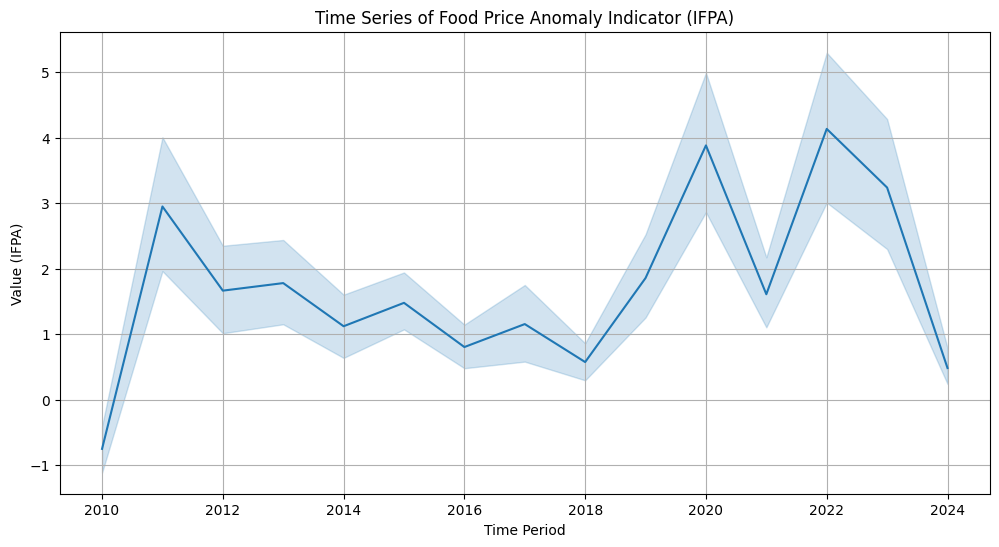

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'TimePeriod' is treated as a numerical type for plotting
df_github['TimePeriod'] = pd.to_numeric(df_github['TimePeriod'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_github, x='TimePeriod', y='Value')
plt.title('Time Series of Food Price Anomaly Indicator (IFPA)')
plt.xlabel('Time Period')
plt.ylabel('Value (IFPA)')
plt.grid(True)
plt.show()

In [6]:
# Get a list of unique countries to choose from
unique_countries = df_github['GeoAreaName'].unique()
print("Available countries for comparison:")
print(unique_countries)

Available countries for comparison:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Azerbaijan' 'Argentina' 'Australia' 'Austria'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Armenia' 'Barbados' 'Belgium' 'Bermuda'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Belize' 'Solomon Islands' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Myanmar' 'Burundi' 'Belarus' 'Cambodia'
 'Cameroon' 'Canada' 'Cabo Verde' 'Cayman Islands' 'Sri Lanka' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo'
 'Democratic Republic of the Congo' 'Cook Islands' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czechia' 'Benin' 'Denmark' 'Dominica' 'Dominican Republic'
 'Ecuador' 'El Salvador' 'Equatorial Guinea' 'Ethiopia' 'Estonia' 'Fiji'
 'Finland' 'Åland Islands' 'France' 'French Guiana' 'French Polynesia'
 'Djibouti' 'Gabon' 'Georgia' 'Gambia' 'State of Palestine' 'Germany'
 'Ghana' 'Kiribati' 'Greece' 'Greenland' 'Grenada' 'Guadeloupe' 'Guam'
 'Gu

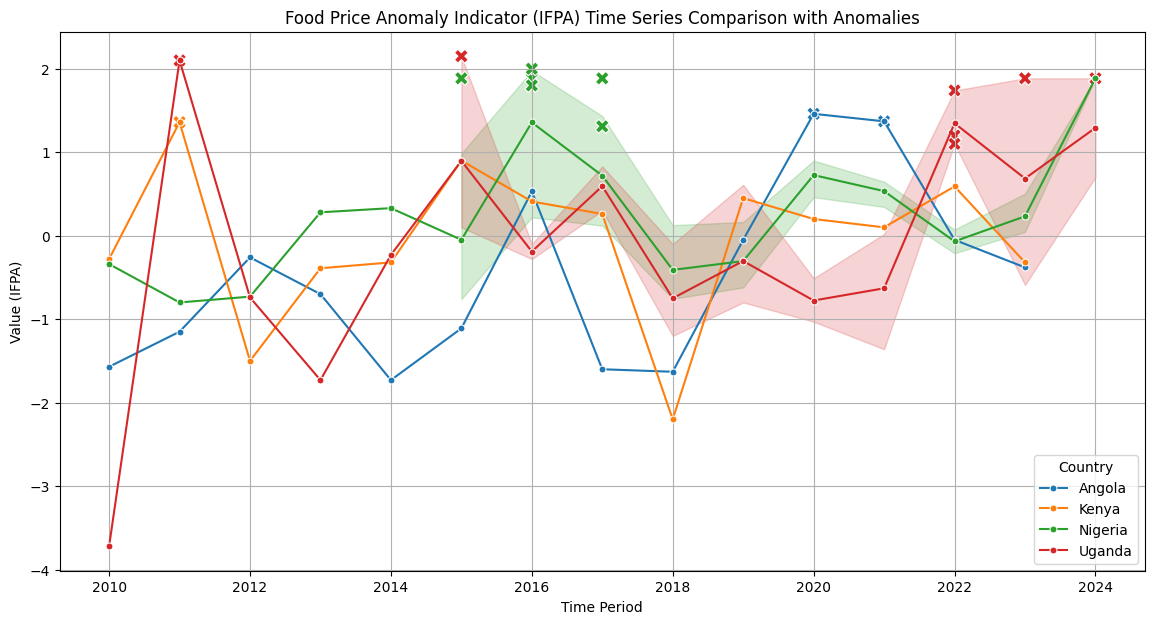

In [20]:
# Select a few countries for comparison
countries_to_compare = ['Nigeria', 'Kenya', 'Angola', 'Uganda'] # Example countries

# Filter the DataFrame for the selected countries
df_compare = df_github[df_github['GeoAreaName'].isin(countries_to_compare)].copy()

# Ensure 'TimePeriod' is numerical
df_compare['TimePeriod'] = pd.to_numeric(df_compare['TimePeriod'])

# Identify anomalies where Value (IFPA) is >= 1
anomalies = df_compare[df_compare['Value'] >= 1].copy()

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_compare, x='TimePeriod', y='Value', hue='GeoAreaName', marker='o', markersize=5, linestyle='-')

# Highlight anomaly points
sns.scatterplot(data=anomalies, x='TimePeriod', y='Value', hue='GeoAreaName', color='red', marker='X', s=100, legend=False)


plt.title('Food Price Anomaly Indicator (IFPA) Time Series Comparison with Anomalies')
plt.xlabel('Time Period')
plt.ylabel('Value (IFPA)')
plt.grid(True)
plt.legend(title='Country')
plt.savefig('time series comparison with anomalies.png')
plt.show()

Correlation Matrix:


,Goal,GeoAreaCode,TimePeriod,Value,Time_Detail,Value_Normalized
Goal,NaN,NaN,NaN,NaN,NaN,NaN
GeoAreaCode,NaN,1.000000,0.028958,-0.176248,0.028958,-0.176248
TimePeriod,NaN,0.028958,1.000000,0.072902,1.000000,0.072902
Value,NaN,-0.176248,0.072902,1.000000,0.072902,1.000000
Time_Detail,NaN,0.028958,1.000000,0.072902,1.000000,0.072902
Value_Normalized,NaN,-0.176248,0.072902,1.000000,0.072902,1.000000


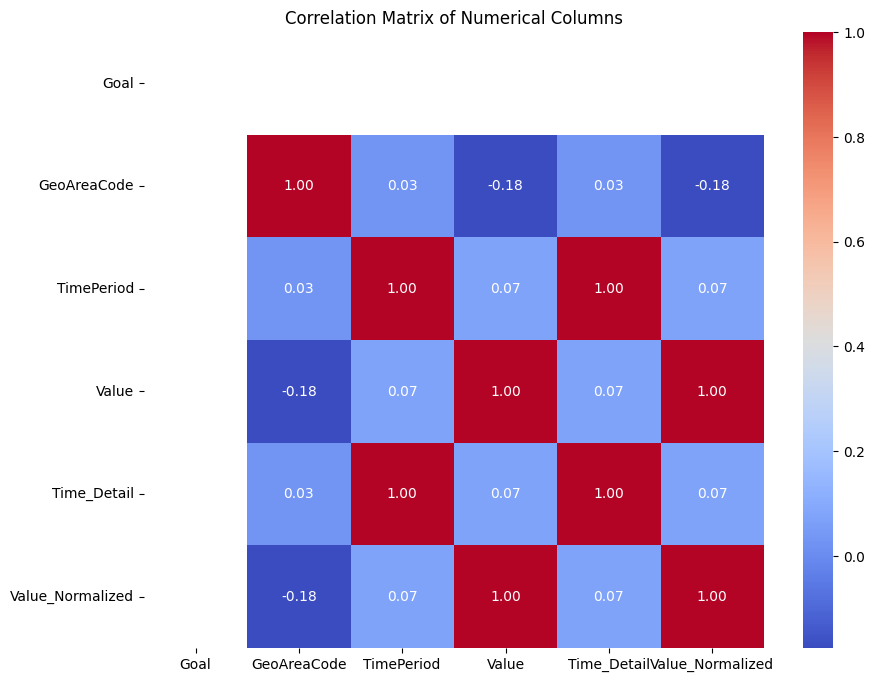

In [19]:
# Select only numerical columns for correlation analysis
numerical_df = df_github.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

print("Correlation Matrix:")
display(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.savefig('correlation matrix.png')
plt.show()

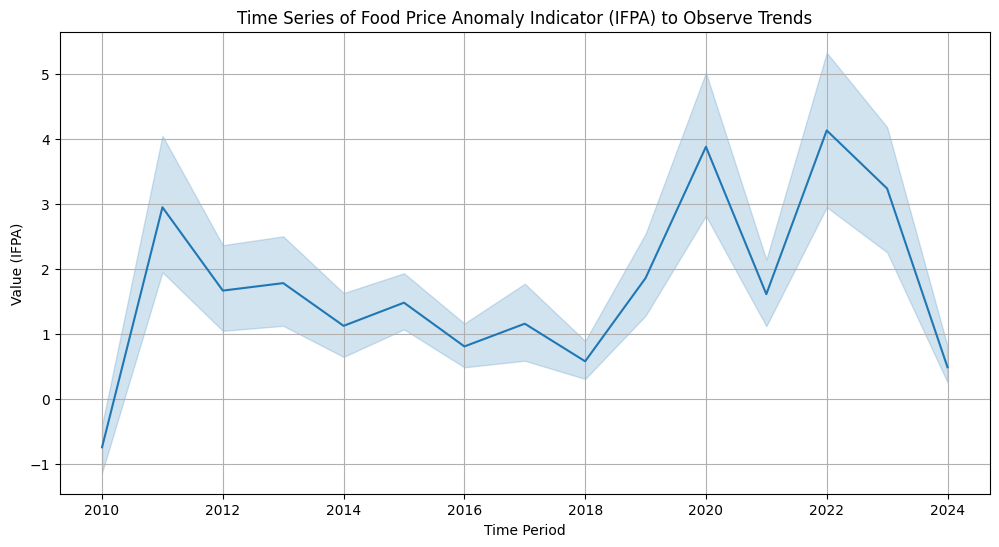

In [18]:
# Visualize the time series again to look for trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_github, x='TimePeriod', y='Value')
plt.title('Time Series of Food Price Anomaly Indicator (IFPA) to Observe Trends')
plt.xlabel('Time Period')
plt.ylabel('Value (IFPA)')
plt.grid(True)
plt.savefig('time series of IFPA.png')
plt.show()

In [14]:
# Prepare data for modeling - focusing on the 'Value' time series

# For a basic predictive model, we can use past values to predict future values
# Let's create a lagged feature (e.g., IFPA value from the previous year)

df_model = df_github[['TimePeriod', 'Value']].copy()

# Sort by TimePeriod to ensure correct lagging
df_model = df_model.sort_values(by='TimePeriod')

# Create a lagged feature (IFPA value from the previous year)
# We'll use a lag of 1, meaning we'll use the value from TimePeriod - 1 to predict the current Value
df_model['Value_Lag1'] = df_model['Value'].shift(1)

# Drop rows with NaN values created by the lag (the first row)
df_model.dropna(inplace=True)

print("Data with lagged feature:")
display(df_model.head())

# Split data into training and testing sets
# For time series data, a common approach is to split based on time
train_size = int(len(df_model) * 0.8) # 80% for training, 20% for testing
train_df, test_df = df_model[0:train_size], df_model[train_size:]

print("\nTraining data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)

print("\nTraining data head:")
display(train_df.head())

print("\nTesting data head:")
display(test_df.head())

Data with lagged feature:


,TimePeriod,Value,Value_Lag1
2464,2010,-1.03,-0.12
980,2010,-1.14,-1.03
1694,2010,-0.26,-1.14
84,2010,0.07,-0.26
70,2010,0.16,0.07



Training data shape: (4652, 3)
Testing data shape: (1164, 3)

Training data head:


,TimePeriod,Value,Value_Lag1
2464,2010,-1.03,-0.12
980,2010,-1.14,-1.03
1694,2010,-0.26,-1.14
84,2010,0.07,-0.26
70,2010,0.16,0.07



Testing data head:


,TimePeriod,Value,Value_Lag1
2322,2022,2.30,-0.62
5616,2022,16.70,2.30
5617,2022,64.30,16.70
5618,2022,81.00,64.30
2588,2022,0.28,81.00


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
# We are using the lagged value to predict the current value
X_train, y_train = train_df[['Value_Lag1']], train_df['Value']
X_test, y_test = test_df[['Value_Lag1']], test_df['Value']

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

print("Basic Linear Regression Model Trained.")

Basic Linear Regression Model Trained.


Mean Squared Error (MSE): 103.09
R-squared (R2): 0.14


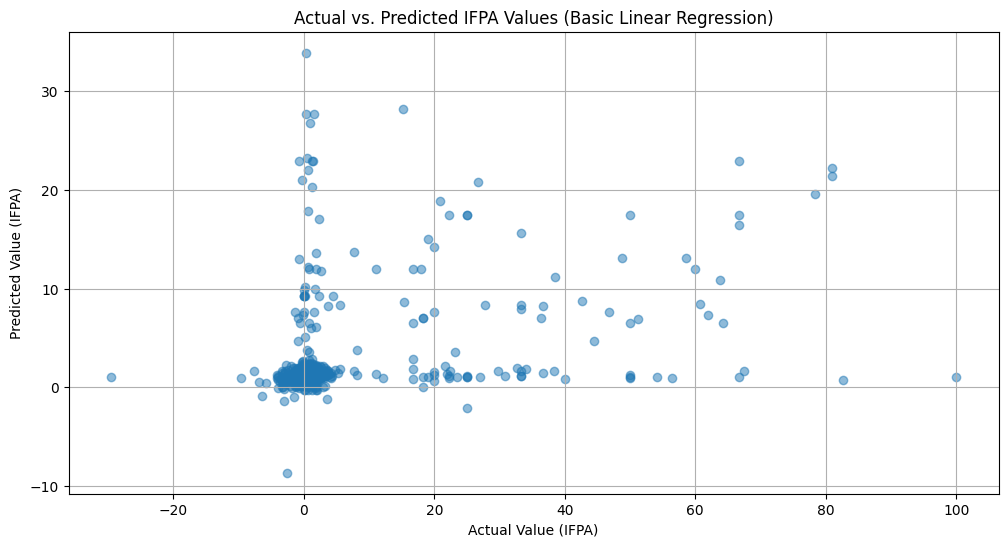

In [17]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optional: Visualize predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Value (IFPA)")
plt.ylabel("Predicted Value (IFPA)")
plt.title("Actual vs. Predicted IFPA Values (Basic Linear Regression)")
plt.grid(True)
plt.savefig('actual_vs_predicted_ifpa.png')
plt.show()

In [21]:
# Identify anomalies where Value (IFPA) is >= 1
anomalies = df_github[df_github['Value'] >= 1].copy()

print("Key Anomalies (IFPA >= 1) across all data:")
display(anomalies)

Key Anomalies (IFPA >= 1) across all data:


,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Nature,Observation Status,Reporting Type,Units,Value_Normalized
26,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",8,Albania,2022,2.63,2022,FAOSTAT Data/ Consumer Price Indices: http://w...,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,INDEX,0.374671
27,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",8,Albania,2023,1.18,2023,FAOSTAT Data/ Consumer Price Indices: http://w...,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,INDEX,0.365359
39,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",12,Algeria,2021,1.25,2021,FAOSTAT Data/ Consumer Price Indices: http://w...,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,INDEX,0.365808
40,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",12,Algeria,2022,1.24,2022,FAOSTAT Data/ Consumer Price Indices: http://w...,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,INDEX,0.365744
45,2,2.c,2.c.1,AG_FPA_CFPI,"Indicator of Food Price Anomalies (IFPA), by C...",20,Andorra,2013,1.66,2013,FAOSTAT Data/ Consumer Price Indices: http://w...,Abnormally high defined as IFPA>=1. Moderately...,G,A,G,INDEX,0.368441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5811,2,2.c,2.c.1,AG_FPA_HMFP,Proportion of countries recording abnormally h...,753,Eastern and South-Eastern Asia,2022,20.00,2022,FAOSTAT Data/ Consumer Price Indices: http://w...,Metadata can be accessed at http://www.fao.org...,N,A,G,PERCENT,0.486224
5812,2,2.c,2.c.1,AG_FPA_HMFP,Proportion of countries recording abnormally h...,753,Eastern and South-Eastern Asia,2022,20.00,2022,FAOSTAT Data/ Consumer Price Indices: http://w...,Metadata can be accessed at http://www.fao.org...,N,A,G,PERCENT,0.486224
5814,2,2.c,2.c.1,AG_FPA_HMFP,Proportion of countries recording abnormally h...,753,Eastern and South-Eastern Asia,2023,20.00,2023,FAOSTAT Data/ Consumer Price Indices: http://w...,Metadata can be accessed at http://www.fao.org...,N,A,G,PERCENT,0.486224
5815,2,2.c,2.c.1,AG_FPA_HMFP,Proportion of countries recording abnormally h...,753,Eastern and South-Eastern Asia,2023,20.00,2023,FAOSTAT Data/ Consumer Price Indices: http://w...,Metadata can be accessed at http://www.fao.org...,N,A,G,PERCENT,0.486224


# Dynamic Report: Food Price Anomaly Analysis

### 1. Introduction

This report analyzes trends and anomalies in the Food Price Anomaly Indicator (IFPA) based on data obtained from [https://unstats.un.org/sdgs/dataportal]. The IFPA is a key metric for identifying periods and regions experiencing unusually high food price fluctuations.

### 2. Data Overview

The analysis utilizes the cleaned food price data. The dataset includes information on the IFPA across different geographic areas and time periods.

### 3. Overall Trends in Food Price Anomalies

The following time series plot shows the overall trend of the Food Price Anomaly Indicator across all available data.

### 4. Regional/Country Comparisons and Anomalies

To understand variations in food price anomalies, we compare the IFPA trends for a selection of countries. The plot below shows the time series for these countries, with highlighted points indicating anomalies (IFPA >= 1).

The table below lists the specific instances across all data where the IFPA was 1 or greater.

### 5. Correlation Analysis

*Based on our analysis, the correlations between IFPA and other numerical columns were low. You can choose to include this section and the correlation matrix/heatmap or omit it if it's not crucial for your policymaker audience.*

### 6. Conclusions and Recommendations

Based on the analysis conducted, here are some key conclusions and recommendations for policymakers:

**Conclusions:**

*   **Overall Trend:** The Food Price Anomaly Indicator (IFPA) shows variability over time, with certain periods exhibiting higher levels of food price anomalies across the dataset.
*   **Regional Differences and Hotspots:** The comparison of selected countries demonstrates that the experience of food price anomalies varies significantly by region, with some countries facing more frequent or intense volatility.
*   **Anomaly Identification:** Specific instances where the IFPA reached or exceeded the threshold for abnormal price levels (IFPA >= 1) were identified, highlighting periods and locations of potential food price shocks.
*   **Limited Basic Predictability:** A basic predictive model using only the previous year's IFPA value showed limited predictive power, suggesting that multiple complex factors influence food price anomalies.

**Recommendations for Policymakers:**

*   **Targeted Monitoring:** Prioritize targeted monitoring of food price indicators in countries and regions historically vulnerable to high volatility.
*   **Early Warning Systems:** Strengthen or develop early warning systems incorporating the IFPA to detect potential food price shocks early.
*   **Investigate Drivers of Anomalies:** Conduct further analysis to understand the underlying causes of significant food price anomalies in identified hotspots.
*   **Support Vulnerable Populations:** Develop and strengthen social safety nets and food security programs during periods of high food price anomalies.
*   **Diversify Food Sources and Markets:** Encourage diversification of domestic food production and reduce reliance on volatile international markets.
*   **Improve Data Collection and Analysis:** Continue investing in robust data collection and explore more sophisticated analytical techniques for better prediction.

In [26]:
# The Streamlit code you want to save to a file
streamlit_code = """
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(layout="wide") # Optional: Use wide layout

st.title("Food Price Anomaly Analysis Report")

st.markdown(\"\"\"
This application presents an analysis of the Food Price Anomaly Indicator (IFPA).
\"\"\")

# --- Data Loading and Preparation ---
@st.cache_data
def load_data(file_path):
    excel_file = pd.ExcelFile(file_path)
    sheet_name = excel_file.sheet_names[0]
    df = excel_file.parse(sheet_name)
    df['TimePeriod'] = pd.to_numeric(df['TimePeriod'])
    return df

# Load the data
data_path = 'cleaned_food_price_data.xlsx' # Make sure this file is accessible to the Streamlit app
df_github = load_data(data_path)

st.header("Data Overview")
st.write("First 5 rows of the data:")
st.write(df_github.head())

st.write("Column Information:")
st.write(df_github.info())

# --- Overall Trends Visualization ---
st.header("Overall Trends in Food Price Anomalies")

st.markdown("The following time series plot shows the overall trend of the Food Price Anomaly Indicator across all available data.")

# Overall Time Series Plot
fig1, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_github, x='TimePeriod', y='Value', ax=ax1)
ax1.set_title('Time Series of Food Price Anomaly Indicator (IFPA)')
ax1.set_xlabel('Time Period')
ax1.set_ylabel('Value (IFPA)')
ax1.grid(True)
st.pyplot(fig1)

# --- Regional/Country Comparisons and Anomalies ---
st.header("Regional/Country Comparisons and Anomalies")

st.markdown("To understand variations in food price anomalies, we compare the IFPA trends for a selection of countries. The plot below shows the time series for these countries, with highlighted points indicating anomalies (IFPA >= 1).")

# Get unique countries for selectbox
unique_countries = df_github['GeoAreaName'].unique().tolist()

# Add a selectbox for country selection (optional: start with a default selection)
selected_countries = st.multiselect(
    "Select countries for comparison:",
    options=unique_countries,
    default=['Nigeria', 'Kenya', 'Angola', 'Uganda'] # Default selection
)

# Filter the DataFrame for the selected countries
if selected_countries:
    df_compare = df_github[df_github['GeoAreaName'].isin(selected_countries)].copy()

    # Identify anomalies where Value (IFPA) is >= 1
    anomalies_compare = df_compare[df_compare['Value'] >= 1].copy()

    # Country Comparison Plot with Anomalies
    fig2, ax2 = plt.subplots(figsize=(14, 7))
    sns.lineplot(data=df_compare, x='TimePeriod', y='Value', hue='GeoAreaName', marker='o', markersize=5, linestyle='-', ax=ax2)
    sns.scatterplot(data=anomalies_compare, x='TimePeriod', y='Value', hue='GeoAreaName', color='red', marker='X', s=100, legend=False, ax=ax2)

    ax2.set_title('Food Price Anomaly Indicator (IFPA) Time Series Comparison with Anomalies')
    ax2.set_xlabel('Time Period')
    ax2.set_ylabel('Value (IFPA)')
    ax2.grid(True)
    ax2.legend(title='Country')
    st.pyplot(fig2)
else:
    st.info("Please select at least one country for comparison.")


# --- Key Anomalies Table ---
st.header("Key Anomalies")

st.markdown("The table below lists the specific instances across all data where the IFPA was 1 or greater.")

# Identify anomalies where Value (IFPA) is >= 1 across all data
anomalies_all = df_github[df_github['Value'] >= 1].copy()

st.write(anomalies_all)


# --- Conclusions and Recommendations (from previous analysis) ---
st.header("Conclusions and Recommendations")

st.markdown(\"\"\"
Based on the analysis conducted, here are some key conclusions and recommendations for policymakers:

**Conclusions:**

*   **Overall Trend:** The Food Price Anomaly Indicator (IFPA) shows variability over time, with certain periods exhibiting higher levels of food price anomalies across the dataset.
*   **Regional Differences and Hotspots:** The comparison of selected countries demonstrates that the experience of food price anomalies varies significantly by region, with some countries facing more frequent or intense volatility.
*   **Anomaly Identification:** Specific instances where the IFPA reached or exceeded the threshold for abnormal price levels (IFPA >= 1) were identified, highlighting periods and locations of potential food price shocks.
*   **Limited Basic Predictability:** A basic predictive model using only the previous year's IFPA value showed limited predictive power, suggesting that multiple complex factors influence food price anomalies.

**Recommendations for Policymakers:**

*   **Targeted Monitoring:** Prioritize targeted monitoring of food price indicators in countries and regions historically vulnerable to high volatility.
*   **Early Warning Systems:** Strengthen or develop early warning systems incorporating the IFPA to detect potential food price shocks early.
*   **Investigate Drivers of Anomalies:** Conduct further analysis to understand the underlying causes of significant food price anomalies in identified hotspots.
*   **Support Vulnerable Populations:** Develop and strengthen social safety nets and food security programs during periods of high food price anomalies.
*   **Diversify Food Sources and Markets:** Encourage diversification of domestic food production and reduce reliance on volatile international markets.
*   **Improve Data Collection and Analysis:** Continue investing in robust data collection and explore more sophisticated analytical techniques for better prediction.
\"\"\")

"""

# Define the filename
file_name = "app.py"

# Write the code to the file
with open(file_name, "w") as f:
    f.write(streamlit_code)

print(f"Streamlit code saved to {file_name}")

Streamlit code saved to app.py


In [ ]:
# The Streamlit code you want to save to a file
streamlit_code = """
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(layout="wide") # Optional: Use wide layout

st.title("Food Price Anomaly Analysis Report")

st.markdown(\"\"\"
This application presents an analysis of the Food Price Anomaly Indicator (IFPA).
\"\"\")

# --- Data Loading and Preparation ---
@st.cache_data
def load_data(file_path):
    excel_file = pd.ExcelFile(file_path)
    sheet_name = excel_file.sheet_names[0]
    df = excel_file.parse(sheet_name)
    df['TimePeriod'] = pd.to_numeric(df['TimePeriod'])
    return df

# Load the data
data_path = 'cleaned_food_price_data.xlsx' # Make sure this file is accessible to the Streamlit app
df_github = load_data(data_path)

st.header("Data Overview")
st.write("First 5 rows of the data:")
st.write(df_github.head())

st.write("Column Information:")
st.write(df_github.info())

# --- Overall Trends Visualization ---
st.header("Overall Trends in Food Price Anomalies")

st.markdown("The following time series plot shows the overall trend of the Food Price Anomaly Indicator across all available data.")

# Overall Time Series Plot
fig1, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_github, x='TimePeriod', y='Value', ax=ax1)
ax1.set_title('Time Series of Food Price Anomaly Indicator (IFPA)')
ax1.set_xlabel('Time Period')
ax1.set_ylabel('Value (IFPA)')
ax1.grid(True)
st.pyplot(fig1)

# --- Regional/Country Comparisons and Anomalies ---
st.header("Regional/Country Comparisons and Anomalies")

st.markdown("To understand variations in food price anomalies, we compare the IFPA trends for a selection of countries. The plot below shows the time series for these countries, with highlighted points indicating anomalies (IFPA >= 1).")

# Get unique countries for selectbox
unique_countries = df_github['GeoAreaName'].unique().tolist()

# Add a selectbox for country selection (optional: start with a default selection)
selected_countries = st.multiselect(
    "Select countries for comparison:",
    options=unique_countries,
    default=['Nigeria', 'Kenya', 'Angola', 'Uganda'] # Default selection
)

# Filter the DataFrame for the selected countries
if selected_countries:
    df_compare = df_github[df_github['GeoAreaName'].isin(selected_countries)].copy()

    # Identify anomalies where Value (IFPA) is >= 1
    anomalies_compare = df_compare[df_compare['Value'] >= 1].copy()

    # Country Comparison Plot with Anomalies
    fig2, ax2 = plt.subplots(figsize=(14, 7))
    sns.lineplot(data=df_compare, x='TimePeriod', y='Value', hue='GeoAreaName', marker='o', markersize=5, linestyle='-', ax=ax2)
    sns.scatterplot(data=anomalies_compare, x='TimePeriod', y='Value', hue='GeoAreaName', color='red', marker='X', s=100, legend=False, ax=ax2)

    ax2.set_title('Food Price Anomaly Indicator (IFPA) Time Series Comparison with Anomalies')
    ax2.set_xlabel('Time Period')
    ax2.set_ylabel('Value (IFPA)')
    ax2.grid(True)
    ax2.legend(title='Country')
    st.pyplot(fig2)
else:
    st.info("Please select at least one country for comparison.")


# --- Key Anomalies Table ---
st.header("Key Anomalies")

st.markdown("The table below lists the specific instances across all data where the IFPA was 1 or greater.")

# Identify anomalies where Value (IFPA) is >= 1 across all data
anomalies_all = df_github[df_github['Value'] >= 1].copy()

st.write(anomalies_all)


# --- Conclusions and Recommendations (from previous analysis) ---
st.header("Conclusions and Recommendations")

st.markdown(\"\"\"
Based on the analysis conducted, here are some key conclusions and recommendations for policymakers:

**Conclusions:**

*   **Overall Trend:** The Food Price Anomaly Indicator (IFPA) shows variability over time, with certain periods exhibiting higher levels of food price anomalies across the dataset.
*   **Regional Differences and Hotspots:** The comparison of selected countries demonstrates that the experience of food price anomalies varies significantly by region, with some countries facing more frequent or intense volatility.
*   **Anomaly Identification:** Specific instances where the IFPA reached or exceeded the threshold for abnormal price levels (IFPA >= 1) were identified, highlighting periods and locations of potential food price shocks.
*   **Limited Basic Predictability:** A basic predictive model using only the previous year's IFPA value showed limited predictive power, suggesting that multiple complex factors influence food price anomalies.

**Recommendations for Policymakers:**

*   **Targeted Monitoring:** Prioritize targeted monitoring of food price indicators in countries and regions historically vulnerable to high volatility.
*   **Early Warning Systems:** Strengthen or develop early warning systems incorporating the IFPA to detect potential food price shocks early.
*   **Investigate Drivers of Anomalies:** Conduct further analysis to understand the underlying causes of significant food price anomalies in identified hotspots.
*   **Support Vulnerable Populations:** Develop and strengthen social safety nets and food security programs during periods of high food price anomalies.
*   **Diversify Food Sources and Markets:** Encourage diversification of domestic food production and reduce reliance on volatile international markets.
*   **Improve Data Collection and Analysis:** Continue investing in robust data collection and explore more sophisticated analytical techniques for better prediction.
\"\"\")

"""

# Define the filename
file_name = "app.py"

# Write the code to the file
with open(file_name, "w") as f:
    f.write(streamlit_code)

print(f"Streamlit code saved to {file_name}")